# **Final Exam**

## **Rohil Ahuja**

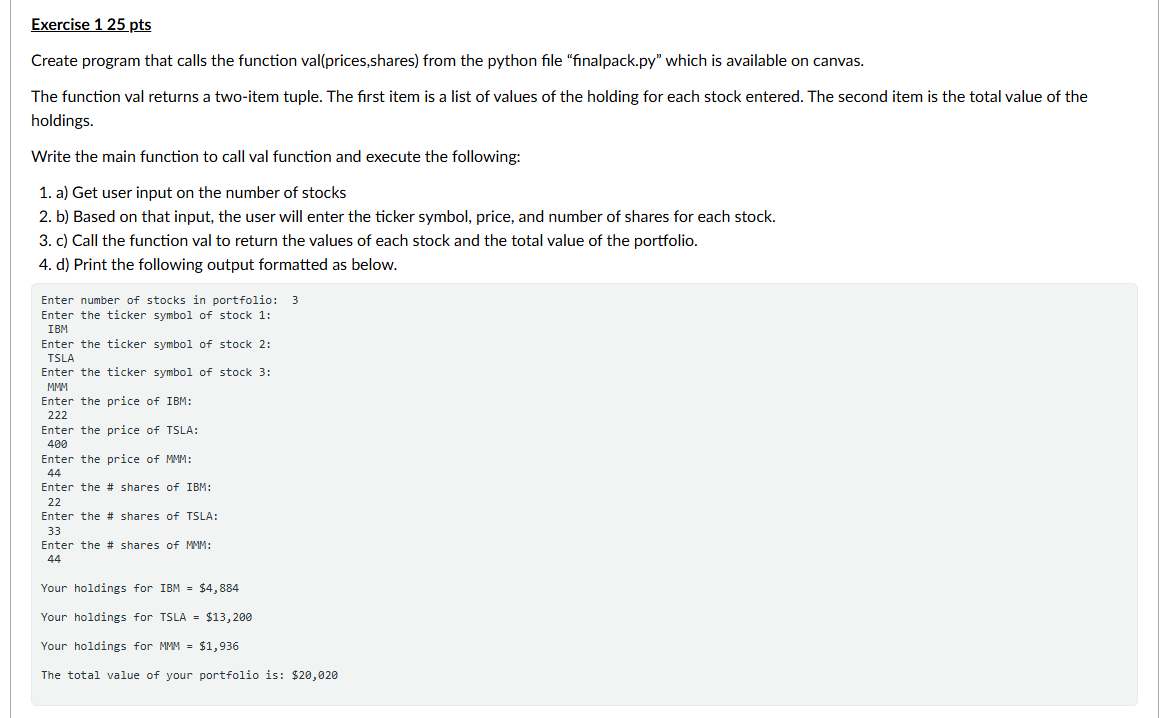

In [1]:
import finalpack as fc

def main():
    n = int(input("Enter the number of stocks in portfolio:  "))
    print("Enter the number of stocks in portfolio: {}".format(n))

    tickers = []
    prices = []
    shares = []
    # tickers = ['IBM', 'TSLA', 'MMM']
    # prices = [222, 400, 44]3
    # shares = [22, 33, 44]

    for i in range(n):
        ticker = input("Enter the ticker symbol of the stock {}: ".format(i+1))
        print("Enter sqaure footage {}: \n {}".format(i+1, ticker))
        tickers.append(ticker)

    for i in range(n):
        price = float(input("Enter the price of {}: ".format(tickers[i])))
        print("Enter the price of {}: \n {:.0f}".format(tickers[i], price))
        prices.append(price)

    for i in range(n):
        share = float(input("Enter the # shares of {}: ".format(tickers[i])))
        print("Enter the # shares of  {}: \n {:.0f}".format(tickers[i], share))
        shares.append(share)

    tup, sum = fc.val(prices, shares)
    
    print(' ')
    for i in range(n):
        print("Your holdings for {} = ${:,.0f}\n".format(tickers[i], tup[i]))

    print("The total value of your portfolio is: ${:,.0f}".format(sum))
main()

Enter the number of stocks in portfolio: 3
Enter sqaure footage 1: 
 IBM
Enter sqaure footage 2: 
 TSLA
Enter sqaure footage 3: 
 MMM
Enter the price of IBM: 
 222
Enter the price of TSLA: 
 400
Enter the price of MMM: 
 44
Enter the # shares of  IBM: 
 22
Enter the # shares of  TSLA: 
 33
Enter the # shares of  MMM: 
 44
 
Your holdings for IBM = $4,884

Your holdings for TSLA = $13,200

Your holdings for MMM = $1,936

The total value of your portfolio is: $20,020


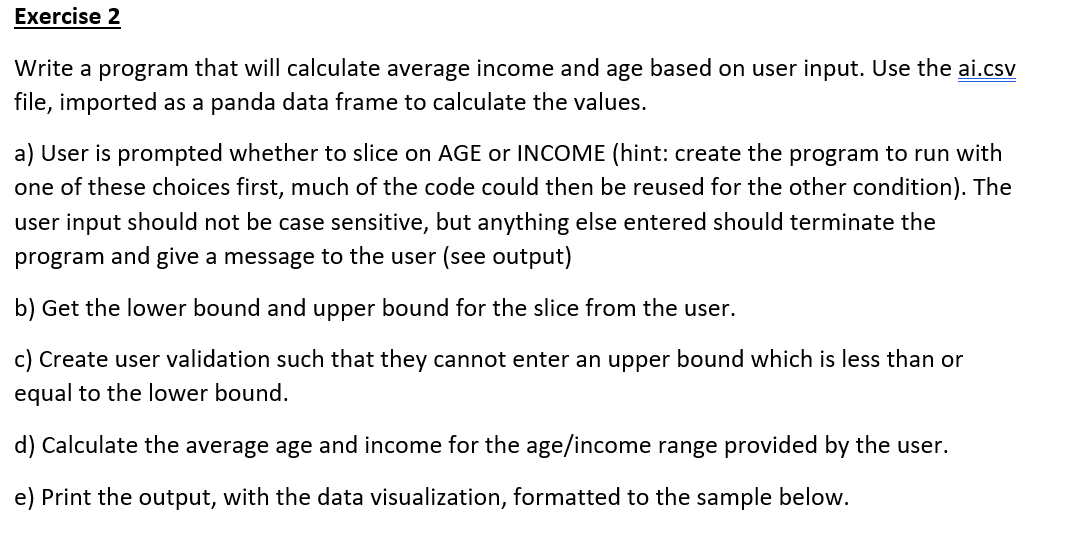

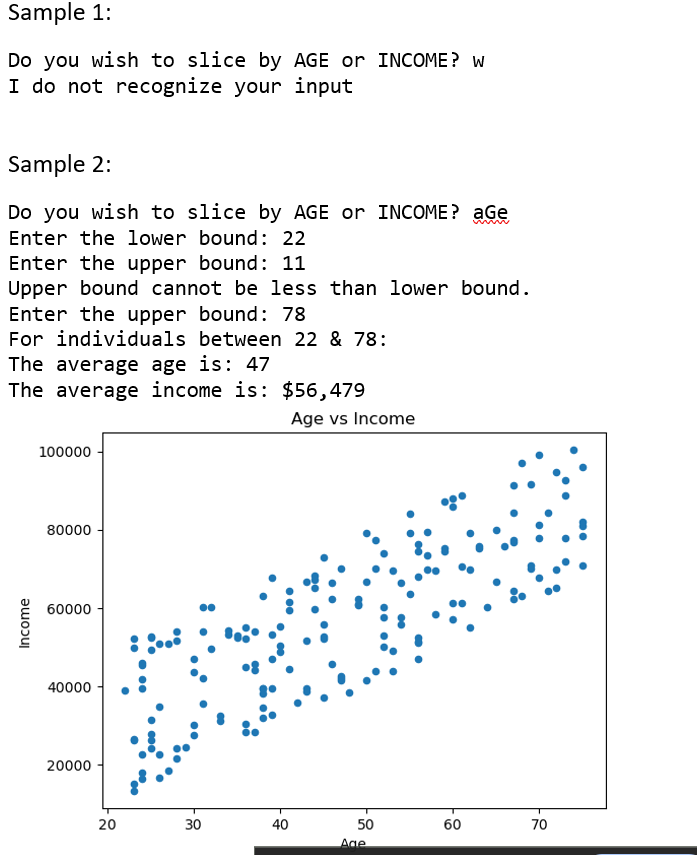

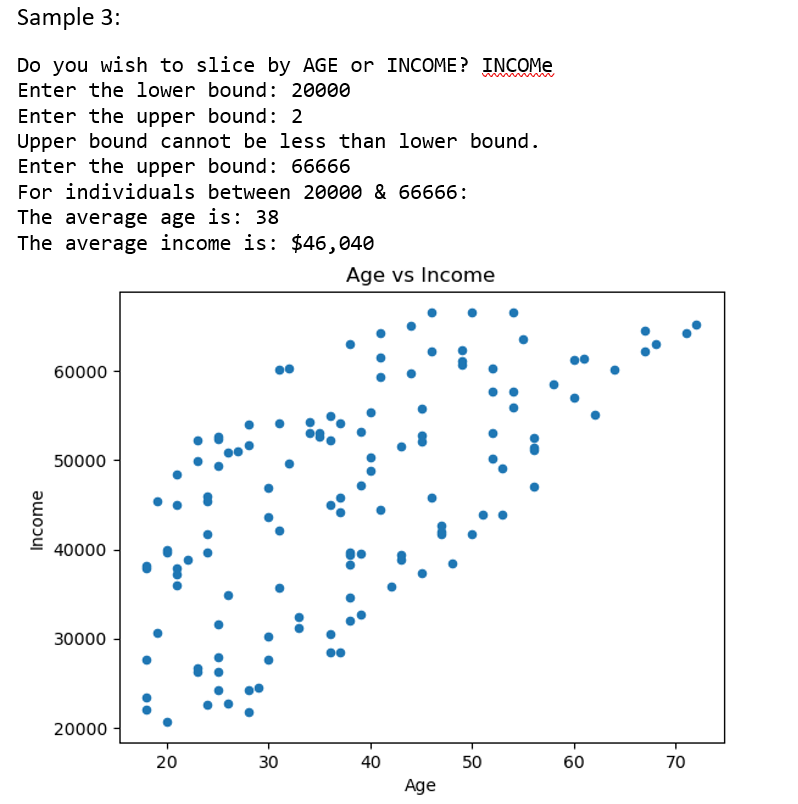

Do you wish to slice by Age or Income: income
Enter the lower bound: 20000
Enter the upper bound: 2
Upper bound cannot be less than lower bound
Enter the upper bound: 66666
For individuals between 20000 and 66666
The average age is: 38
The average income is: $46,040


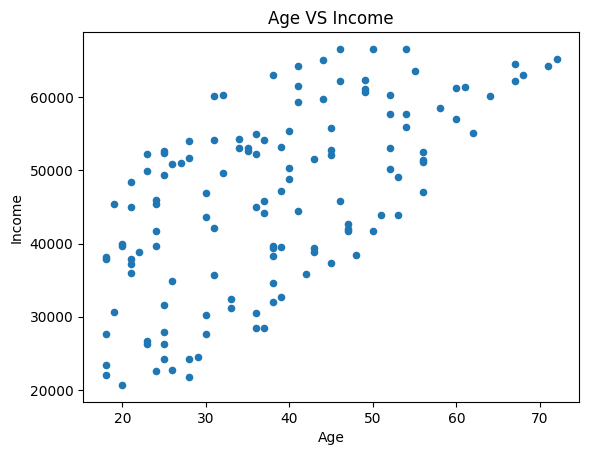

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

def min_max(df):
    min_age = df['Age'].min()
    max_age = df['Age'].max()
    min_income = df['Income'].min()
    max_income = df['Income'].max()
    return [min_age, max_age, min_income, max_income]

def reset_df_index(df):
    df.reset_index(inplace=True)
    df.drop('index', axis=1, inplace=True)
    return df

def sort_df(df, user_coloumn):
    if user_coloumn == 'age':
        df = df.sort_values(by="Age", ascending=True)
        df = reset_df_index(df)
        return df
    else:
        df = df.sort_values(by="Income", ascending=True)
        df = reset_df_index(df)
        return df

def filtering_fun(df, user_coloumn, upper_bound_val, lower_bound_val):
    df = sort_df(df, user_coloumn)
    if (user_coloumn=='age'):
        df_filtered = df[df['Age']>lower_bound_val]
        df_filtered = df_filtered[df_filtered['Age']<upper_bound_val]
        df_filtered = reset_df_index(df_filtered)
        # display(df_filtered)
    if (user_coloumn=='income'):
        df_filtered = df[df['Income']>lower_bound_val]
        df_filtered = df_filtered[df_filtered['Income']<upper_bound_val]
        df_filtered = reset_df_index(df_filtered)
        # display(df_filtered)
    return df_filtered

def avg_df(df_filtered, lower_bound_val, upper_bound_val, user_coloumn):
    print("For individuals between {} and {}".format(lower_bound_val, upper_bound_val))
    avg_age = df_filtered['Age'].mean()
    print("The average age is: {:.0f}".format(avg_age))
    avg_income = df_filtered['Income'].mean()
    print("The average income is: ${:,.0f}".format(avg_income))


def plot_df(df):
    df.plot.scatter(x='Age', y='Income')
    plt.title("Age VS Income")

def main():
    df = pd.read_csv("AI.csv")
    # display(df)

    list_min_max = min_max(df)

    while True:
        user_coloumn = input("Do you wish to slice by Age or Income: ").lower()
        print("Do you wish to slice by Age or Income: {}".format(user_coloumn))

        if (user_coloumn=='age' or user_coloumn=='income'):
            lower_bound_val = int(input("Enter the lower bound: "))
            print("Enter the lower bound: {}".format(lower_bound_val))
            while True:
                upper_bound_val = int(input("Enter the upper bound: "))
                print("Enter the upper bound: {}".format(upper_bound_val))

                if (upper_bound_val<lower_bound_val):
                    print("Upper bound cannot be less than lower bound")
                    continue
                else:
                    break
            break
        else:
            continue

    df_filtered = filtering_fun(df, user_coloumn, upper_bound_val, lower_bound_val)
    avg_df(df_filtered, lower_bound_val, upper_bound_val, user_coloumn)

    plot_df(df_filtered)

main()